In [40]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 
import csv
import pandasql as psql

In [41]:
#train data imported
train = pd.read_csv(r"C:\Users\k.leelasaipavan\Desktop\inter\ass-4\BankData.csv", header=0)

#validation data imported
valid = pd.read_csv(r"C:\Users\k.leelasaipavan\Desktop\inter\ass-4\BankData_Val.csv")

#submission file 
sub = pd.read_csv(r"C:\Users\k.leelasaipavan\Desktop\inter\ass-4\BankData_Submission.csv")

#creating backup files 
traindata_bk=train.copy()
valid_bk = valid.copy()
sub_bk = sub.copy()

In [42]:
#checking the values in train dataset
train.head()

,Account_Num,Region_Num,Sincome,Education,Dependents,Job_Type,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Abalance,AB>$1000,Check_Bounce,Auto_Loan,Home_Loan,Default_Payment,Personal_Loan,Salary_Account,CreditCard,Type_CC
0,ON-1250616241,Region_03,No,3,0,Type_01,373,234,191,353,301,425,360,226,362,489,403,177,324.50,0,No,1,No,No,Yes,No,No,No Card
1,BM-1219023153,Region_04,No,6,1,Type_03,2067,1917,474,1142,982,1565,1315,1083,879,1244,1913,1316,1324.75,9,No,0,No,No,Yes,No,Yes,Platinum
2,FN-1259236165,Region_04,No,1,2,Type_02,976,1378,819,1317,184,953,922,593,992,525,1521,517,891.42,3,No,0,No,No,Yes,No,No,No Card
3,YG-1297867485,Region_01,No,1,0,Type_03,1740,908,1046,693,554,536,374,628,781,616,1824,1187,907.25,4,No,0,No,No,No,No,No,No Card
4,WD-1272527693,Region_01,Yes,3,3,Type_03,1157,1697,1077,1847,1808,939,1042,824,180,1805,921,1773,1255.83,8,No,1,No,No,No,No,No,No Card


In [43]:
#getting information of train dataset for checking datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30246 entries, 0 to 30245
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Num      30246 non-null  object 
 1   Region_Num       30246 non-null  object 
 2   Sincome          30246 non-null  object 
 3   Education        30246 non-null  int64  
 4   Dependents       30246 non-null  int64  
 5   Job_Type         30246 non-null  object 
 6   Jun              30246 non-null  int64  
 7   Jul              30246 non-null  int64  
 8   Aug              30246 non-null  int64  
 9   Sep              30246 non-null  int64  
 10  Oct              30246 non-null  int64  
 11  Nov              30246 non-null  int64  
 12  Dec              30246 non-null  int64  
 13  Jan              30246 non-null  int64  
 14  Feb              30246 non-null  int64  
 15  Mar              30246 non-null  int64  
 16  Apr              30246 non-null  int64  
 17  May         

In [71]:
#checking for NULL values
train.isnull().sum()

Region_Num         0
Sincome            0
Education          0
Dependents         0
Job_Type           0
Jun                0
Jul                0
Aug                0
Sep                0
Oct                0
Nov                0
Dec                0
Jan                0
Feb                0
Mar                0
Apr                0
May                0
Abalance           0
AB>$1000           0
Check_Bounce       0
Auto_Loan          0
Home_Loan          0
Default_Payment    0
Personal_Loan      0
Salary_Account     0
CreditCard         0
Type_CC            0
dtype: int64

In [44]:
#checking unique values
train.nunique()

Account_Num        30246
Region_Num             5
Sincome                2
Education              6
Dependents             7
Job_Type               4
Jun                 1981
Jul                 1983
Aug                 1973
Sep                 1976
Oct                 1982
Nov                 1972
Dec                 1978
Jan                 1980
Feb                 1987
Mar                 1982
Apr                 1979
May                 1975
Abalance            9246
AB>$1000              13
Check_Bounce           2
Auto_Loan              2
Home_Loan              2
Default_Payment        2
Personal_Loan          2
Salary_Account         2
CreditCard             2
Type_CC                4
dtype: int64

In [46]:
#delect Account_num column 
del train['Account_Num']

In [61]:
#getting information of valid dataset
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region_Num       6050 non-null   object 
 1   Sincome          6050 non-null   object 
 2   Education        6050 non-null   int64  
 3   Dependents       6050 non-null   int64  
 4   Job_Type         6050 non-null   object 
 5   Jun              6050 non-null   int64  
 6   Jul              6050 non-null   int64  
 7   Aug              6050 non-null   int64  
 8   Sep              6050 non-null   int64  
 9   Oct              6050 non-null   int64  
 10  Nov              6050 non-null   int64  
 11  Dec              6050 non-null   int64  
 12  Jan              6050 non-null   int64  
 13  Feb              6050 non-null   int64  
 14  Mar              6050 non-null   int64  
 15  Apr              6050 non-null   int64  
 16  May              6050 non-null   int64  
 17  Abalance      

In [48]:
#checking NULL values in valid dataset
valid.isnull().sum()

Account_Num        0
Region_Num         0
Sincome            0
Education          0
Dependents         0
Job_Type           0
Jun                0
Jul                0
Aug                0
Sep                0
Oct                0
Nov                0
Dec                0
Jan                0
Feb                0
Mar                0
Apr                0
May                0
Abalance           0
AB>$1000           0
Check_Bounce       0
Auto_Loan          0
Home_Loan          0
Default_Payment    0
Personal_Loan      0
Salary_Account     0
CreditCard         0
dtype: int64

In [49]:
#removing Account_Num column in valid dataset
del valid['Account_Num']

In [50]:
#using labelEncoder for encoding object datatype columns in train dataset
from sklearn.preprocessing import LabelEncoder
oh = LabelEncoder()
for col in train.columns:
    if train[col].dtypes == 'object':
        train[col] = oh.fit_transform(train[col])

In [62]:
#using labelEncoder for encoding object datatype columns in valid dataset

from sklearn.preprocessing import LabelEncoder
oh = LabelEncoder()
for col in valid.columns:
    if valid[col].dtypes == 'object':
        valid[col] = oh.fit_transform(valid[col])

In [51]:
#checking the datatypes in dataset after encoding
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30246 entries, 0 to 30245
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region_Num       30246 non-null  int32  
 1   Sincome          30246 non-null  int32  
 2   Education        30246 non-null  int64  
 3   Dependents       30246 non-null  int64  
 4   Job_Type         30246 non-null  int32  
 5   Jun              30246 non-null  int64  
 6   Jul              30246 non-null  int64  
 7   Aug              30246 non-null  int64  
 8   Sep              30246 non-null  int64  
 9   Oct              30246 non-null  int64  
 10  Nov              30246 non-null  int64  
 11  Dec              30246 non-null  int64  
 12  Jan              30246 non-null  int64  
 13  Feb              30246 non-null  int64  
 14  Mar              30246 non-null  int64  
 15  Apr              30246 non-null  int64  
 16  May              30246 non-null  int64  
 17  Abalance    

In [52]:
#seperating independent variable and dependent variable 
IndepVar = []
for col in train.columns:
    if col != 'Type_CC':
        IndepVar.append(col)

TargetVar = 'Type_CC'
x = train[IndepVar]
y = train[TargetVar]

In [53]:
#dividing the dataset into train and test
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24196, 26), (6050, 26), (24196,), (6050,))

[[  37    0   34    0]
 [   0 5652    0    0]
 [  71    0  219   31]
 [   0    0    4    2]]
Print Class: 0
TP=37, FN=34, TN=5908, FP=71
Accuracy: 0.983
Precision: 0.343
Sensitivity: 0.521
F1-Score: 0.413
Specificity: 0.988
Balanced Accuracy: 0.754
MCC: 0.414

Print Class: 1
TP=5652, FN=0, TN=398, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=219, FN=102, TN=5691, FP=38
Accuracy: 0.977
Precision: 0.852
Sensitivity: 0.682
F1-Score: 0.758
Specificity: 0.993
Balanced Accuracy: 0.838
MCC: 0.751

Print Class: 3
TP=2, FN=4, TN=6013, FP=31
Accuracy: 0.994
Precision: 0.061
Sensitivity: 0.333
F1-Score: 0.103
Specificity: 0.995
Balanced Accuracy: 0.664
MCC: 0.14

Overall Performance Prediction:
Accuracy: 98.85%
Precision: 56.4%
Recall or Sensitivity: 63.4%
F1-Score: 0.5685
Specificity or True Nagative Rate: 99.4%
Balanced Accuracy: 81.4%

MCC: 0.5762

roc_auc_score: 0.989
--------------------------------------

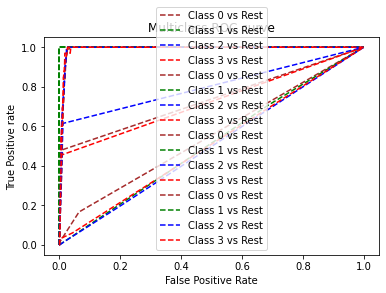

In [75]:
# To build the 'Multi Label Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier



# Create an object for model

ModelRF = RandomForestClassifier()
ModelDT = DecisionTreeClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

MM = [ModelRF,ModelKNN,ModelDT,ModelET]

for models in MM:
   



    # Train the model with training data

    models = models.fit(x_train,y_train)

    # Predict the model with test data set

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob
   
    # Class = Label 0-12

    lst_classes = [0, 1, 2, 3]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
   
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
   
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
   
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
   
    # OVERALL - FINAL PREDICTION PERFORMANCE

    # importing mean()

    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

    #
    # ROC curve for Multi classes

    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 4

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

    # ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
    # all other classes.

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                                average='weighted'),3))
    print('-----------------------------------------------------------------------------------------------------')
    """from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred,multi_class="ovr")
    fpr, tpr, thresholds = roc_curve(y_test,models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show() """
    print('-----------------------------------------------------------------------------------------------------')
    """new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn,
               'False Positive': fp,
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'Balanced Accuracy':balanced_accuracy}
    HF_Results = HF_Results.append(new_row, ignore_index=True)"""

#-----------------------------------------------------------------------------------------------------------


In [64]:
print(y_pred1)

[0 0 2 ... 2 3 3]


In [66]:
sub["Type_CC"]=sub["Type_CC"].replace({"???":y_pred1})

In [70]:
sub.head(20)

,Account_Num,Type_CC
0,JB-1897134884,0
1,OL-1963292372,0
2,ON-1638509444,2
3,QM-1513701538,0
4,HA-1522096101,0
5,MF-1762513899,0
6,XU-1873434517,0
7,NS-1736341266,0
8,GY-1531556701,0
9,CG-1962205237,2


In [77]:
sub.to_csv('C:\\Users\\k.leelasaipavan\\Desktop\\inter\\ass-4\\BankData_Submission.csv', index = False)

In [63]:
#prediction of validation dataset
y_pred1 = ModelRF.predict(valid)
